# Improving metagenome metadata using curated databases

The SRA has inconsistent metadata. A random forests classifiers predicting metagenome "ScientificNames" (biome) only had 41% accuracy. While this might be the highest accuracy acheiveable, I'm willing to bet that poor model performance is a reflection of incorrect or incomplete metadata. For example, the classifier performed particularly poorly for the category "metagenome," likely because this label doesn't actually reflect the biome of the sample.

[This issue](https://github.com/dib-lab/2022-sra-gather/issues/9) records curated sets of metadata for metagenomes. This notebook investigates the coverage of curated metadata over the initial 10k gather data sets and compares the curated labels against the SRA labels.

This notebook looks at the three most accessible databases. 
+ HMgDB: human microbiome metagenomes. Provides a downloadable CSV file with curated accessions recorded 
+ TMgDB: terrestrial microbiome metagenomes. Provides a downloadable CSV file with curated accessions recorded.
+ MGNify: provides curated biomes for >300k microbiomes. The notebook `notebooks/20220318_fetch_paginated_data_ebi.ipynb` provides python codes to scrape the API and download the available biome metadata.

Note the download links for the hmgdb and tmgdb csvs are not persistent, and have to be regenerated from the website (https://webapp.ufz.de/hmgdb/ and https://webapp.ufz.de/tmgdb/).

In [1]:
setwd("..")

In [64]:
# change default figure size
options(repr.plot.width=15, repr.plot.height=15)
# disable scientific notation (for plot axes)
options(scipen = 999)

In [93]:
library(readr)
library(dplyr)
library(ggplot2)
library(ggthemes)

## Read in curated metadata sets

In [10]:
hmdb <- read_csv("https://webapp.ufz.de/hmgdb/session/785b73f01eb46b41d6c17f2a6eece62a/download/download_reduced_complete?w=", show_col_types = F)
head(hmdb)

Warning message:
“One or more parsing issues, see `problems()` for details”


library_id,project_id,sample_id,BioprojectID,PubmedID,project_name,HMgDB_sample_site_1,HMgDB_sample_site_2,HMgDB_sample_site_3,HMgDB_sample_site_4,⋯,assembled,sequence_count,basepairs_count,average_length,quality_above_30_SRA,Q30_SRA,drisee_score_raw_MGRAST,creation_date,update_date,source_database
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>
SRR3340629,SRX1683607,SRS1378921,317435,NA,ImMicroDyn,gut,stool,NA,NA,⋯,No,32283453,6.40e+09,198,95,35.82,NA,2017-05-02,2016-04-06,SRA
SRR3340631,SRX1683609,SRS1378922,317435,NA,ImMicroDyn,gut,stool,NA,NA,⋯,No,28139242,5.56e+09,198,93,35.64,NA,2017-05-02,2016-04-06,SRA
ERR478998,ERX444830,ERS436676,266076,NA,Potential of fecal microbiota for early stage detection of colorectal cancer,gut,stool,NA,NA,⋯,No,4222017,6.54e+08,155,96,37.27,NA,2014-11-02,2015-08-20,SRA
ERR478999,ERX444831,ERS436676,266076,NA,Potential of fecal microbiota for early stage detection of colorectal cancer,gut,stool,NA,NA,⋯,No,4245124,6.63e+08,156,96,37.33,NA,2014-11-02,2015-08-20,SRA
ERR479006,ERX444838,ERS436724,266076,NA,Potential of fecal microbiota for early stage detection of colorectal cancer,gut,stool,NA,NA,⋯,No,4824462,8.20e+08,170,97,37.54,NA,2014-11-02,2015-08-20,SRA
ERR479007,ERX444839,ERS436724,266076,NA,Potential of fecal microbiota for early stage detection of colorectal cancer,gut,stool,NA,NA,⋯,No,4635568,7.68e+08,166,97,37.50,NA,2014-11-02,2015-08-20,SRA


In [11]:
tmdb <- read_csv("https://webapp.ufz.de/tmdb/session/2f99cce94dd5ea49f6973006004198a4/download/download_explorerData?w=", show_col_types = F)
head(tmdb)

library_id,project_id,sample_id,TMDB_material,TMDB_biome,project_name,sample_location,sample_depth,sample_elevation,sample_altitude,⋯,seq_platform,assembled,sequence_count,basepairs_count,average_length,quality_above_30_SRA,mean_quality_SRA,drisee_score_raw_MGRAST,creation_date,source_database
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
DRR000019,DRX000009,DRS000009,water,NA,Subsurface mine microbial mat metagenome,NA,NA,NA,NA,⋯,LS454,No,11052,2838707,257,22,27.30,NA,2011-03-30,SRA
DRR000836,DRX000494,DRS000509,soil; water,NA,Rice rhizosphere metagenome,NA,0.97,NA,NA,⋯,LS454,No,1268608,658785694,519,57,29.05,NA,2014-04-12,SRA
DRR000980,DRX000630,DRS000638,soil; water,NA,Metagenomic analysis of rice shoot-associated bacteria,NA,0.97,NA,NA,⋯,LS454,No,1207522,596228115,494,62,30.59,NA,2014-06-30,SRA
DRR000981,DRX000631,DRS000639,soil; water,NA,Metagenomic analysis of rice shoot-associated bacteria,NA,0.97,NA,NA,⋯,LS454,No,802422,424054817,528,63,30.78,NA,2014-06-30,SRA
DRR001455,DRX001009,DRS001007,soil,NA,Dynamics of the gene pool of soil microbiota disturbed by chemical pollution,NA,NA,NA,NA,⋯,ILLUMINA,No,21452087,3217813050,150,28,17.91,NA,2015-12-31,SRA
DRR001456,DRX001010,DRS001008,soil,NA,Dynamics of the gene pool of soil microbiota disturbed by chemical pollution,NA,NA,NA,NA,⋯,ILLUMINA,No,12911269,1936690350,150,35,19.71,NA,2015-12-31,SRA


In [39]:
ebi <- read_csv("notebooks/samples.csv", show_col_types = F) 
head(ebi)

New names:
* biome -> biome...3
* biome -> biome...21

Warning message:
“One or more parsing issues, see `problems()` for details”


accession,analysis-completed,biome...3,biosample,collection-date,environment-biome,environment-feature,environment-material,geo-loc-name,host-tax-id,⋯,longitude,runs,sample-alias,sample-desc,experiment-type,study,instrument-model,sample-identifier,biome...21,study2
<chr>,<date>,<lgl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>
SRS459011,2016-06-13,NA,SAMN02254243,NA,NA,NA,NA,NA,9606,⋯,NA,NA,RAV113_UAB055_2_6,vaginal_metagenome UAB055_2_6,NA,NA,root:Host-associated:Human:Reproductive system:Vagina,NA,NA,NA
SRS458487,2016-06-13,NA,SAMN02253217,NA,NA,NA,NA,NA,9606,⋯,NA,NA,RAV111_UAB017_10_3,vaginal_metagenome UAB017_10_3,NA,NA,root:Host-associated:Human:Reproductive system:Vagina,NA,NA,NA
SRS458474,2016-06-13,NA,SAMN02253204,NA,NA,NA,NA,NA,9606,⋯,NA,NA,RAV111_UAB017_1_7,vaginal_metagenome UAB017_1_7,NA,NA,root:Host-associated:Human:Reproductive system:Vagina,NA,NA,NA
SRS458440,2016-06-13,NA,SAMN02253170,NA,NA,NA,NA,NA,9606,⋯,NA,NA,RAV105_UAB015_6_3,vaginal_metagenome UAB015_6_3,NA,NA,root:Host-associated:Human:Reproductive system:Vagina,NA,NA,NA
SRS458417,2016-06-13,NA,SAMN02253147,NA,NA,NA,NA,NA,9606,⋯,NA,NA,RAV105_UAB015_2_6,vaginal_metagenome UAB015_2_6,NA,NA,root:Host-associated:Human:Reproductive system:Vagina,NA,NA,NA
SRS459350,2016-06-13,NA,SAMN02254589,NA,NA,NA,NA,NA,9606,⋯,NA,NA,RAV150_UAB096_2_5,vaginal_metagenome UAB096_2_5,NA,NA,root:Host-associated:Human:Reproductive system:Vagina,NA,NA,NA


## Read in original metadata 

In [ ]:
gather_accessions <- gsub(".gather.csv", "", basename(Sys.glob("results/*csv")))

In [21]:
runinfo <- read_csv("all.runinfo.csv", show_col_types = F) %>%
    filter(Run %in% gather_accessions)
head(runinfo)

Warning message:
“One or more parsing issues, see `problems()` for details”


Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,⋯,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
DRR014176,2015-07-27 10:27:35,2015-07-27 10:32:25,30807540,3734314174,0,121,2297,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos2/sra-pub-run-6/DRR014176/DRR014176.1,⋯,NA,NA,NA,NA,NIID,DRA001171,NA,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D
DRR019507,2016-03-05 08:47:09,2016-03-05 08:53:45,8517086,4246043700,8517086,498,2687,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos2/sra-pub-run-3/DRR019507/DRR019507.1,⋯,NA,NA,NA,NA,MIYAZAKI,DRA001862,NA,public,4580B926CA1E057CDED2089BF0BB1003,D456B6384D34959FC2706FACB199D719
DRR021939,2015-01-15 10:15:18,2015-01-15 10:18:19,18645,10781479,0,578,28,NA,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/sos1/sra-pub-run-5/DRR021939/DRR021939.1,⋯,NA,NA,NA,NA,TOHOKUGL,DRA002421,NA,public,B36925AE092F9ED96FA6EE6435522481,B904CCB0FE4FA1A287DDB5177B781F85
DRR025071,2016-03-09 18:20:13,2016-03-10 05:18:09,65366252,19609875600,65366252,300,10905,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos2/sra-pub-run-3/DRR025071/DRR025071.1,⋯,NA,NA,NA,NA,KYOTO_PREF,DRA002733,NA,public,ED1A01B5C747C37B3641528802099C4C,C55C7EABB80C9A01ADA378250F62561A
DRR033608,2017-04-04 02:09:11,2017-04-04 02:11:18,289545,107341206,222112,370,68,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos2/sra-pub-run-4/DRR033608/DRR033608.1,⋯,NA,NA,NA,NA,TOKYO_MEDEN,DRA003492,NA,public,44D4796C7305510DBDE5FE617739FEBC,05A90580ABF79435CF976FE95807263A
DRR042304,2016-03-09 18:39:22,2016-03-10 00:38:05,13080182,1952719426,0,149,1208,NA,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/sos2/sra-pub-run-3/DRR042304/DRR042304.1,⋯,NA,NA,NA,NA,UT_COB,DRA003827,NA,public,DD4EDB2A6B72A0C649ABC2DA05BC38BF,1DFA20EA4FDA1A7B9C9AB3D67A9B6669


## Assess coverage of SRA 10k in curated databases

First, look at the coverage of the 10k accessions in the curated databases

In [22]:
table(runinfo$Run %in% c(hmdb$library_id, tmdb$library_id))


FALSE  TRUE 
 8904  1139 

In [23]:
table(gather_accessions %in% c(hmdb$library_id, tmdb$library_id))


FALSE  TRUE 
 8872  1128 

In [40]:
table(runinfo$Sample %in% ebi$accession)


FALSE  TRUE 
 8423  1620 

then label accessions with curated database they're found in and tally

In [45]:
runinfo <- runinfo %>%
  mutate(curated_metadata = ifelse(Run %in% hmdb$library_id, "human", NA),
         curated_metadata = ifelse(Run %in% tmdb$library_id, "terrestrial", curated_metadata),
         curated_metadata = ifelse(Sample %in% ebi$accession, "ebi", curated_metadata)) 

runinfo %>%
  group_by(curated_metadata) %>%
  tally()

curated_metadata,n
<chr>,<int>
ebi,1620
human,585
terrestrial,107
NA,7731


## Does the curated metadata match the SRA labels, or provide additional information?

In [47]:
hmdb_runinfo <- runinfo %>%
  filter(Run %in% hmdb$library_id) %>%
  left_join(hmdb, by = c("Run" = "library_id")) %>%
  select(Run, ScientificName, HMgDB_sample_site_1, HMgDB_sample_site_2, HMgDB_sample_site_3)

In [48]:
head(hmdb_runinfo)

Run,ScientificName,HMgDB_sample_site_1,HMgDB_sample_site_2,HMgDB_sample_site_3
<chr>,<chr>,<chr>,<chr>,<chr>
DRR014176,human metagenome,NA,NA,NA
DRR042304,human gut metagenome,gut,NA,NA
DRR042358,human gut metagenome,gut,NA,NA
DRR042386,human gut metagenome,gut,NA,NA
DRR042446,human gut metagenome,gut,NA,NA
DRR042485,human gut metagenome,gut,NA,NA


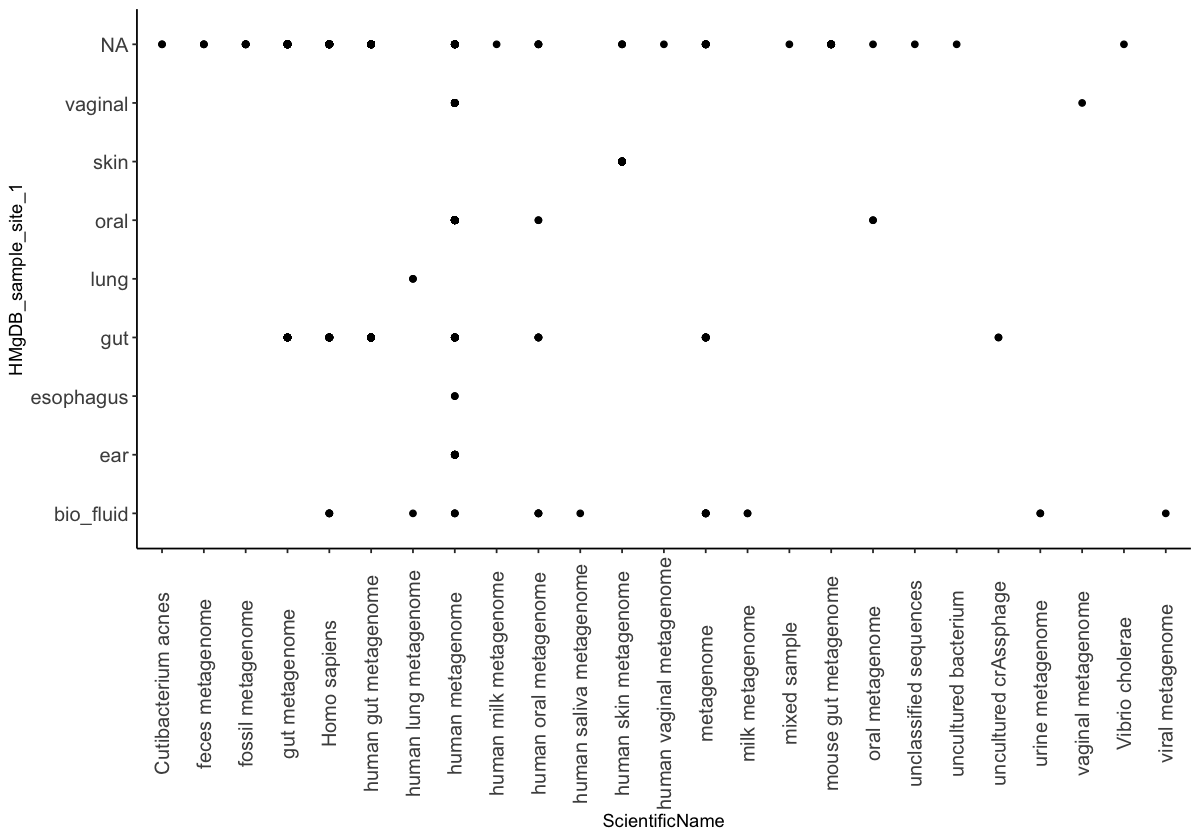

In [57]:
ggplot(hmdb_runinfo, aes(x = ScientificName, y = HMgDB_sample_site_1)) +
  geom_point() +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = .5),
        axis.text = element_text(size = 12))

### MGnify

In [66]:
ebi_runinfo <- runinfo %>%
  filter(Sample %in% ebi$accession) %>%
  left_join(ebi, by = c("Sample" = "accession")) %>%
  select(Run, ScientificName, biome = `instrument-model`) %>%
  mutate(biome = gsub("root:", "", biome))

In [67]:
head(ebi_runinfo)

Run,ScientificName,biome
<chr>,<chr>,<chr>
DRR042304,human gut metagenome,Host-associated:Human:Digestive system
DRR042358,human gut metagenome,Host-associated:Human:Digestive system
DRR042386,human gut metagenome,Host-associated:Human:Digestive system
DRR042446,human gut metagenome,Host-associated:Human:Digestive system
DRR042485,human gut metagenome,Host-associated:Human:Digestive system
DRR042584,human gut metagenome,Host-associated:Human:Digestive system


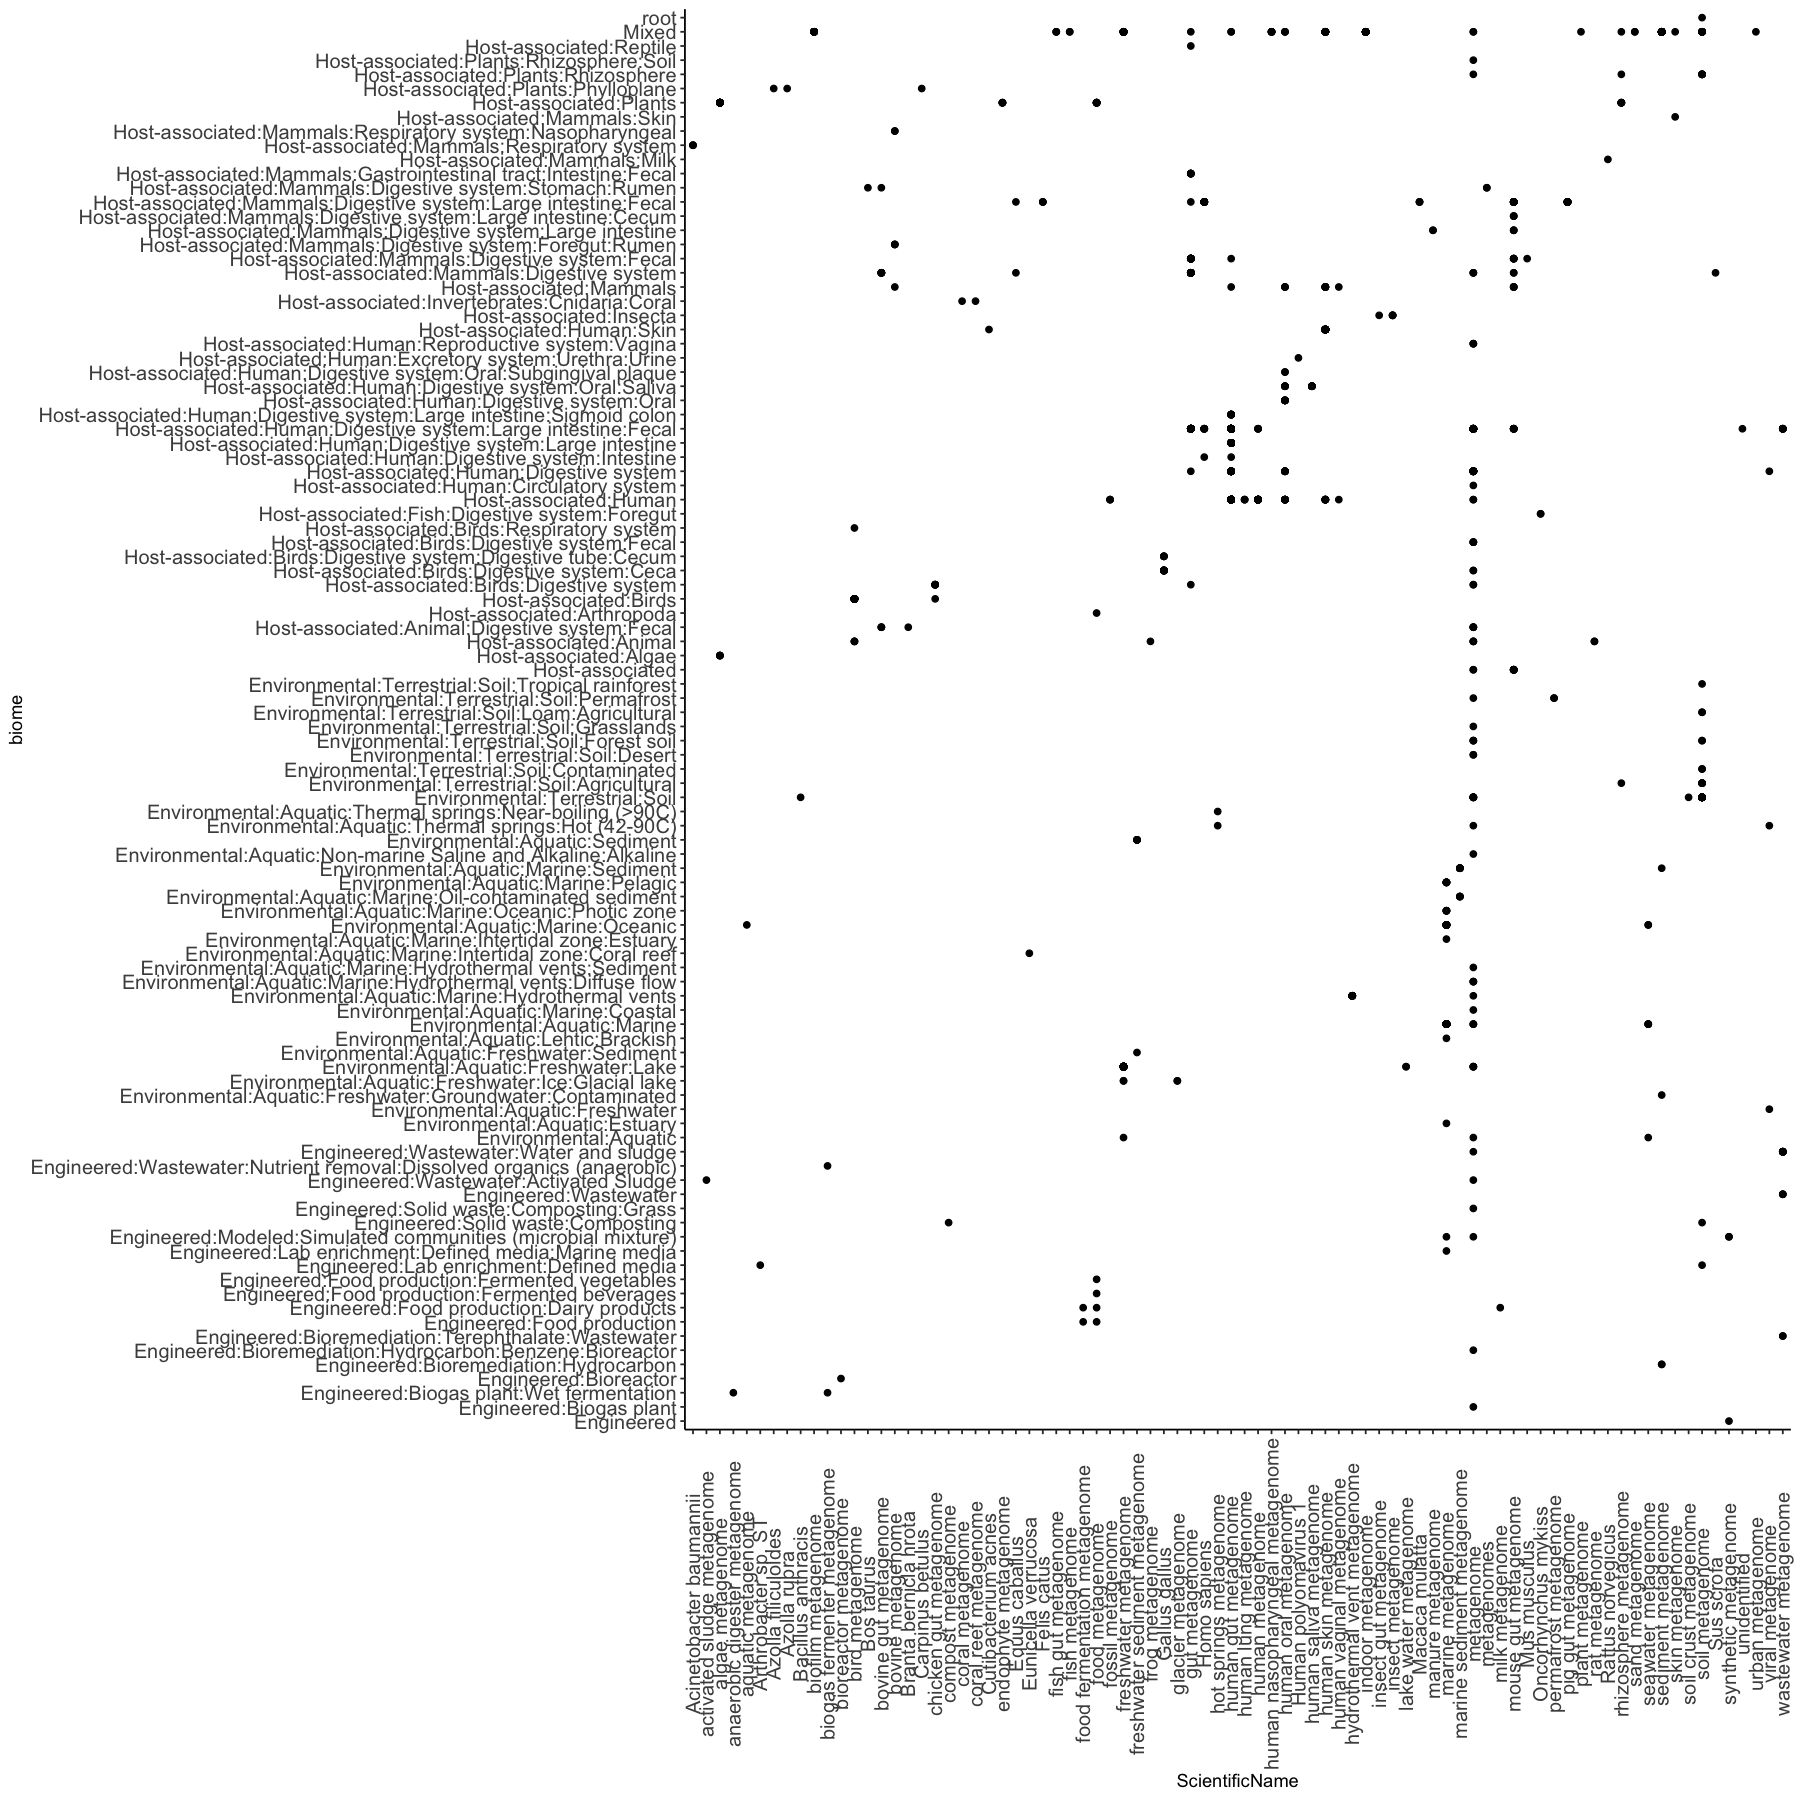

In [68]:
ggplot(ebi_runinfo, aes(x = ScientificName, y = biome)) +
  geom_point() +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = .5),
        axis.text = element_text(size = 12))

In [101]:
sci_label <- ebi_runinfo %>%
  group_by(ScientificName) %>%
  tally() %>% 
  arrange(desc(n)) %>%
  mutate(sci_label = ifelse(n > 14, ScientificName, "other"))

plot_order <- ebi_runinfo %>%
  group_by(biome) %>% 
  tally() %>%
  arrange(desc(n)) %>%
  select(biome, plot_order = n)

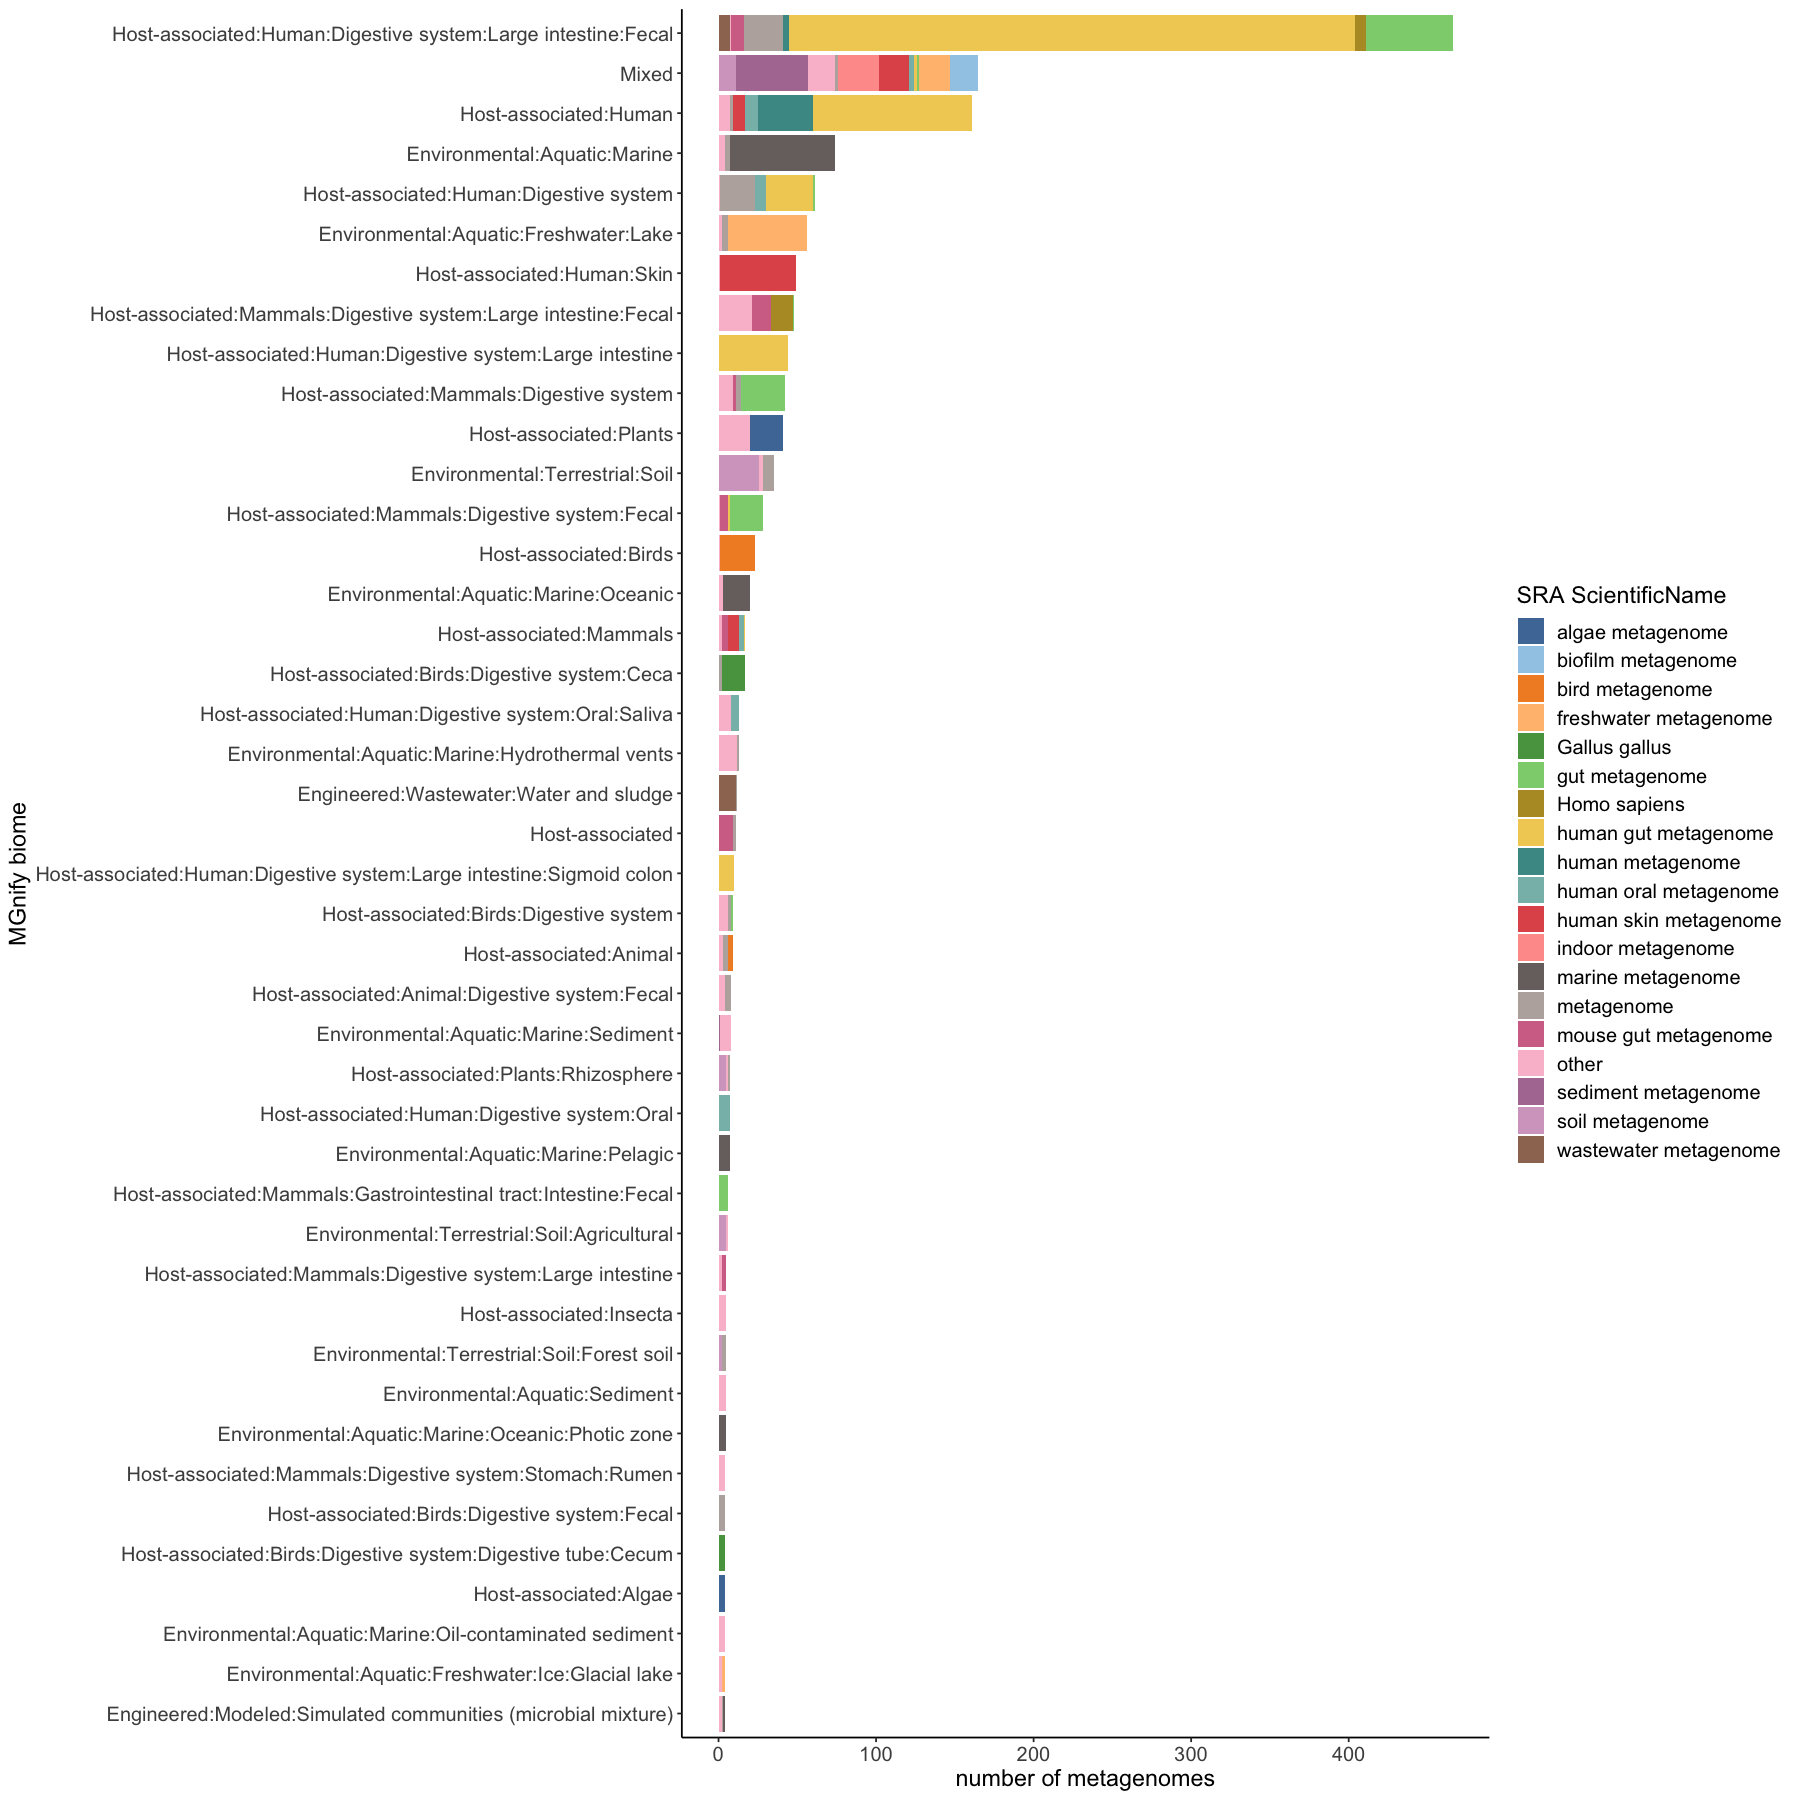

In [116]:
ggplot(ebi_runinfo %>% 
         left_join(sci_label, by = 'ScientificName') %>%
         left_join(plot_order, by = 'biome') %>%
         filter(plot_order > 3),
        aes(x = reorder(biome, plot_order), fill = sci_label)) +
  geom_bar() +
  theme_classic() +
  theme(axis.text = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        axis.title = element_text(size = 14)) +
  scale_fill_tableau(palette = "Tableau 20") +
  coord_flip() +
  labs(x = "MGnify biome", y = "number of metagenomes", fill = "SRA ScientificName")